# Data preparation
### Zadání: Objednala si vás národní turistická agentura, abyste zhodnotili vybraná města a jejich návštěvníky podle recenzí podniků.
##### Check each csv file


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#load reviews
dfRew = pd.read_csv('dataset/reviews.csv')
dfRew

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57
1,egHMQBhFeaLhVyC6w3r0vQ,HvpNr0ohHCaVLp014CQrdw,gGvNgShksetPoimyKV8I9Q,4,0,0,0,Quickly stopped in for a UFC fight. I sat down...,2015-10-04 05:37:01
2,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46
3,WxrK52MRJy6Cxk_vOJeD1Q,9d22a-5XXvsZ55p04gI5jA,_gOz7-aHMyGUHOtjDrEv2w,2,4,2,0,"When we first arrived at the Coco Key, we were...",2017-09-20 15:38:27
4,GgWFjRHhelaiUgR2-H6N4g,pRPT3vqhqpU7kHgmKJamvw,-_GnwXmzC3DXsHR9nyaC2g,3,0,0,0,3.5 stars! I got the avocado margarita and it ...,2012-11-06 07:09:57
...,...,...,...,...,...,...,...,...,...
214869,Mc6gBUoqj8VNyGHBOTIPCw,_XXa8CyI4uKOdu6RRbWE4g,cs6HfZNykLVitm09jWFqWg,4,5,3,4,I went here for brunch with 2 friends on a Sun...,2018-04-17 00:28:02
214870,jDMk2EEGG-fkuA2rnCr0zg,KTgetFhipsOG1vWfVuSaiA,cs6HfZNykLVitm09jWFqWg,5,0,0,0,Our group shared dinner entrees and side dishe...,2017-10-13 21:02:12
214871,MbmrN5q_JKkokjOdqLXxhQ,SF2Hu55kX9QJDvZETuZ9eg,uXOVFQraz1va1TrtgiqYTg,4,0,0,0,This was a fun place to dine. It is a one chef...,2016-10-31 20:47:16
214872,2n2PbNLYlQSRs88VrZtrGg,_BwuIa1-qjIL1PdYB_awyA,Gzo1G_mMc2kpduvK2yQFYg,2,0,0,0,The food was ok. I order the pork bites and it...,2015-07-21 13:21:59


In [98]:
dfRew['stars'].value_counts()

5    93663
4    57316
3    26455
1    20479
2    16961
Name: stars, dtype: int64

In [101]:
dfBus = pd.read_csv('dataset/businesses.csv')
dfBus['review_count']

0       406
1       856
2       395
3      1001
4       336
       ... 
351    6221
352    4295
353    1553
354    2179
355    2734
Name: review_count, Length: 356, dtype: int64

In [50]:
with open("test.txt", 'r') as f:
    x = f.read()
import ast
x = ast.literal_eval(x)

In [51]:
def checkIfExists(categories, item):
    if f"{item}," in categories:
        return 1
    return 0

In [52]:
for item in x:
    dfBus[f"Category_{item}"] = dfBus.apply(lambda x: checkIfExists(x.categories, item), axis = 1)

In [53]:
dfBus.head(5)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,business_id,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Decor,Category_Home Services,Category_Hookah Bars,Category_Hot Dogs,C

In [102]:
dfUsr = pd.read_csv('dataset/users.csv')
dfUsr['review_count'].agg(max)

14691

In [55]:
dfBus.value_counts()

Series([], dtype: int64)

## Sjednocení datasetů

In [56]:
dfTest = pd.merge(dfRew, dfBus, left_on='business_id', right_on='business_id', how='left')
dfTest.head(5)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Decor,Categor

In [57]:
dfTest = pd.merge(dfTest, dfUsr, left_on='user_id', right_on='user_id', how='left')
dfTest.head(5)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count_x,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Dec

In [58]:
dfTest['business_id'].nunique()

356

In [59]:
dfNums = dfTest.select_dtypes(include=np.number)

In [60]:
dfNums

,stars_x,useful_x,funny_x,cool_x,postal_code,attributes.DietaryRestrictions,stars_y,latitude,attributes.RestaurantsPriceRange2,attributes.HairSpecializesIn,is_open,longitude,review_count_x,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Decor,Category_Home Services,Category_Hookah Bars,Category_Hot Dogs,Category_Hot Pot,Category_Hotels,Category_Hotels & Travel,Category_IT Services & Computer Repair,Category_Ice Cream & Frozen Yogurt,Category_Indian,Category_Irish,Category_Irish Pub,Category_Italian,Category_Izakaya,Category_Japanese,Category_Jazz & Blues,Category_Juice Bars & Smoothies,Category_Karaoke,Category_Kitchen & Bath,Category_Korean,Category_Landmarks & Historical Buildings,Category_Laser Hair Removal,Category_Laser Tag,Category_Latin American,Category_Lebanese,Category_Limos,Category_Live/Raw Food,Category_Local Flavor,Category_Local Services,Category_Lounges,Category_Macarons,Category_Mags,Category_Massage,Category_Massage Schools,Category_Meat Shops,Category_Medical Spas,Category_Mediterranean,Category_Men's Clothing,Category_Mexican,Category_Middle Eastern,Category_Modern European,Category_Moroccan,Category_Museums,Category_Music & Video,Category_Music Venues,Category_Musicians,Category_Nail Salons,Category_New Mexican Cuisine,Category_Newspapers & Magazines,Category_Nightlife,Category_Noodles,Categor

<ipython-input-61-06777dfde9f8>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfNums.hist(ax=ax)


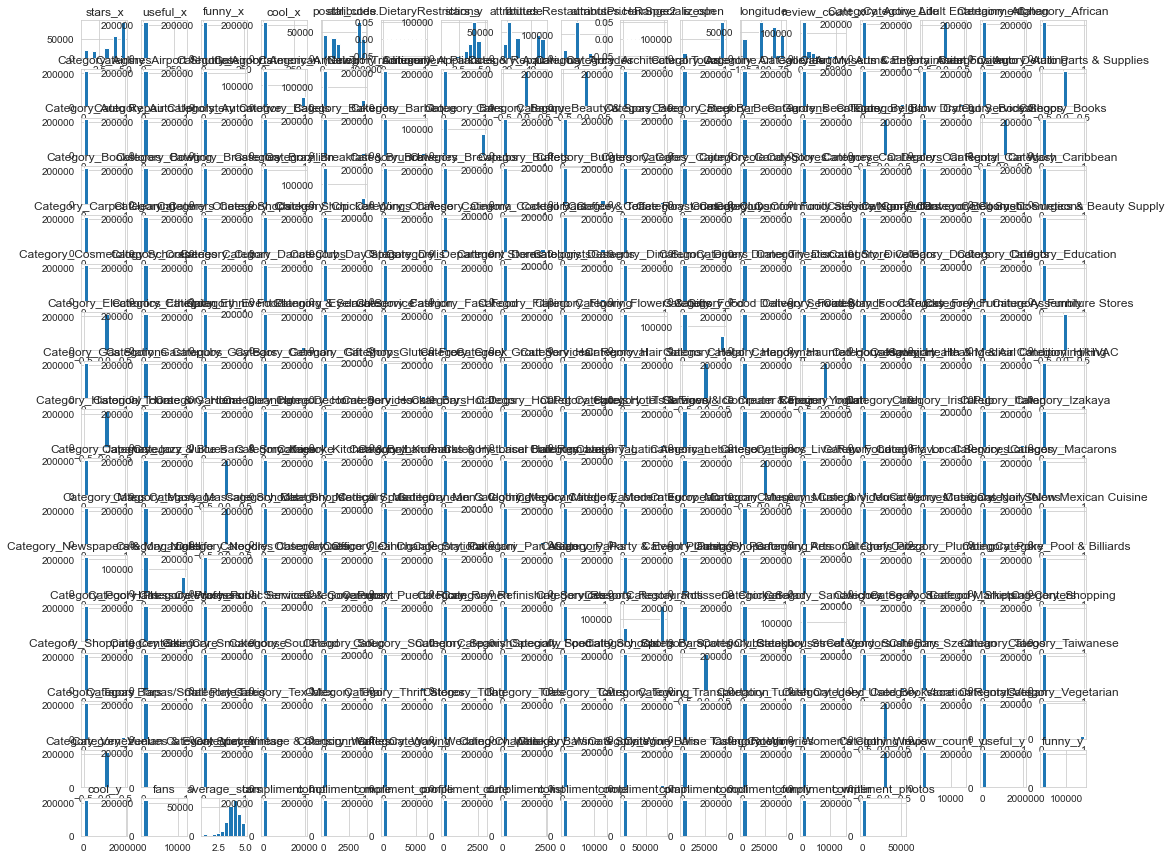

In [61]:
fig = plt.figure(figsize = (18,15))
ax = fig.gca()
dfNums.hist(ax=ax)
plt.show()

In [62]:
df = dfTest

In [63]:
# for column in df:
#     print("Total number of nans for %s is %s out of %s" % (column, df[column].isna().sum(), len(df)))

In [64]:
df['date'] = pd.to_datetime(df.date)

In [65]:
# df.info()

<AxesSubplot:ylabel='Density'>

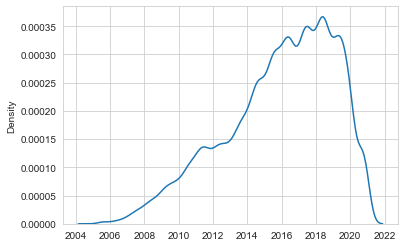

In [66]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(df.date))

In [67]:
df = df.drop(['hours.Wednesday','postal_code','hours.Thursday','hours.Tuesday','hours.Friday','hours.Monday',
             'hours.Saturday','hours.Sunday'], axis=1)

In [68]:
from IPython.display import display

pd.options.display.max_columns = None
display(df)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,attributes.Smoking,attributes.DietaryRestrictions,city,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,attributes.BestNights,review_count_x,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Decor,Category_Home Services,Category_Hookah Bars,Category_Hot Dogs,Category_Hot Pot,Category_Hotels,Category_Hote

In [69]:
filter_col = [col for col in df if col.startswith('attribut')]
filter_col

['attributes.RestaurantsDelivery',
 'attributes.Open24Hours',
 'attributes.DogsAllowed',
 'attributes.CoatCheck',
 'attributes.Smoking',
 'attributes.DietaryRestrictions',
 'attributes.RestaurantsGoodForGroups',
 'attributes.BYOB',
 'attributes.AgesAllowed',
 'attributes.Alcohol',
 'attributes.RestaurantsPriceRange2',
 'attributes.RestaurantsTableService',
 'attributes.HairSpecializesIn',
 'attributes.RestaurantsCounterService',
 'attributes.Corkage',
 'attributes.GoodForKids',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.HappyHour',
 'attributes.WheelchairAccessible',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.BYOBCorkage',
 'attributes.Ambience',
 'attributes.BestNights',
 'attributes.ByAppointmentOnly',
 'attributes.NoiseLevel',
 'attributes.DriveThru',
 'attributes.HasTV',
 'attributes.WiFi',
 'attributes.Music',
 'attributes.BusinessParking',
 'attributes.RestaurantsAttire',
 'attributes.GoodForMeal',
 'attributes.GoodForDancing',
 'attributes.Caters',
 'attribut

In [70]:
dfRep = df[filter_col]


In [71]:
for column in dfRep:
    dfRep[column].fillna(False, inplace=True)
dfRep

C:\Users\mates\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,attributes.Smoking,attributes.DietaryRestrictions,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,attributes.Ambience,attributes.BestNights,attributes.ByAppointmentOnly,attributes.NoiseLevel,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,attributes.BusinessParking,attributes.RestaurantsAttire,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,True,False,False,False,False,False,True,False,False,u'full_bar',2.0,True,False,False,False,True,False,True,True,True,False,"{'touristy': False, 'hipster': False, 'romanti...",False,False,u'average',False,True,u'no',False,"{'garage': False, 'street': False, 'validated'...",u'casual',"{'dessert': False, 'latenight': False, 'lunch'...",False,True,False,True,"{'Alcohol': ""u'full_bar'"", 'HasTV': 'True', 'N...",True,True,None
1,True,False,False,False,u'outdoor',False,True,False,False,u'full_bar',2.0,True,False,False,False,True,False,True,True,True,False,"{'touristy': False, 'hipster': False, 'romanti...","{'monday': False, 'tuesday': False, 'friday': ...",False,u'loud',False,True,u'free',"{'dj': False, 'background_music': False, 'no_m...","{'garage': None, 'street': None, 'validated': ...",u'casual',"{'dessert': None, 'latenight': True, 'lunch': ...",False,False,False,False,"{'Alcohol': ""u'full_bar'"", 'HasTV': 'True', 'N...",True,True,True
2,True,False,False,False,False,False,True,False,False,u'none',1.0,True,False,False,False,True,False,False,False,True,'yes_free',"{'romantic': False, 'intimate': False, 'touris...",False,False,u'average',False,True,u'no',False,"{'garage': False, 'street': False, 'validated'...",'casual',"{'dessert': False, 'latenight': False, 'lunch'...",False,False,False,False,"{'BusinessParking': ""{'garage': False, 'street...",True,True,False
3,False,False,False,False,False,False,False,False,False,False,2.0,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,'free',False,"{'garage': False, 'street': False, 'validated'...",False,False,False,False,False,False,"{'DogsAllowed': 'False', 'BusinessParking': ""{...",False,True,False
4,True,False,True,False,False,False,True,False,False,'full_bar',2.0,True,False,False,False,True,False,True,True,True,'no',"{'touristy': False, 'hipster': False, 'romanti...",False,False,u'average',False,True,'free',False,"{'garage': False, 'street': True, 'validated':...",'casual',"{'dessert': False, 'latenight': False, 'lunch'...",False,True,False,False,"{'Alcohol': ""'full_bar'"", 'HasTV': 'True', 'No...",True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214869,False,False,True,False,u'no',False,True,False,False,'full_bar',2.0,True,False,False,False,True,False,True,True,True,'no',"{'touristy': False, 'hipster': None, 'romantic...","{'monday': False, 'tuesday': False, 'friday': ...",False,u'average',False,True,u'free',"{'dj': None, 'background_music': False, 'no_mu...","{'garage': False, 'street': True, 'validated':...",'casual',"{'dessert': None, 'latenight': False, 'lunch':...",False,False,False,False,"{'Alcohol': ""'full_bar'"", 'HasTV': 'True', 'No...",True,True,True
214870,False,False,True,False,u'no',False,True,False,False,'full_bar',2.0,True,False,False,False,True,False,True,True,True,'no',"{'touristy': False, 'hipster': 

In [72]:
for column in df[filter_col]:
    df[column].replace('no', False)
df

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,attributes.Smoking,attributes.DietaryRestrictions,city,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,attributes.BestNights,review_count_x,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Decor,Category_Home Services,Category_Hookah Bars,Category_Hot Dogs,Category_Hot Pot,Category_Hotels,Category_Hote

### Delete useless columns, no value for us, messy etc

In [73]:
#Delete columns with  only one unique value
df = df[[c for c
        in list(df)
        if len(df[c].unique()) > 1]]

In [74]:
df = df.drop(['attributes.BYOB', 'attributes.CoatCheck','attributes.Corkage','attributes.BYOBCorkage',
              'attributes.Caters','attributes.Open24Hours', 'attributes'], axis=1)

In [75]:
filter_col = [col for col in df if col.startswith('attribut')]
filter_col

['attributes.RestaurantsDelivery',
 'attributes.DogsAllowed',
 'attributes.Smoking',
 'attributes.RestaurantsGoodForGroups',
 'attributes.AgesAllowed',
 'attributes.Alcohol',
 'attributes.RestaurantsPriceRange2',
 'attributes.RestaurantsTableService',
 'attributes.RestaurantsCounterService',
 'attributes.GoodForKids',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.HappyHour',
 'attributes.WheelchairAccessible',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.Ambience',
 'attributes.BestNights',
 'attributes.ByAppointmentOnly',
 'attributes.NoiseLevel',
 'attributes.DriveThru',
 'attributes.HasTV',
 'attributes.WiFi',
 'attributes.Music',
 'attributes.BusinessParking',
 'attributes.RestaurantsAttire',
 'attributes.GoodForMeal',
 'attributes.GoodForDancing',
 'attributes.AcceptsInsurance',
 'attributes.RestaurantsReservations',
 'attributes.RestaurantsTakeOut',
 'attributes.BikeParking',
 'attributes.OutdoorSeating']

In [89]:
df['attributes.BusinessAcceptsBitcoin'].value_counts()

True     144849
False     70025
Name: attributes.BusinessAcceptsBitcoin, dtype: int64

In [77]:
for column in df[filter_col]:
    print(df[column].value_counts())

True     123766
False     42139
None      31783
Name: attributes.RestaurantsDelivery, dtype: int64
False    116279
True      32475
None        516
Name: attributes.DogsAllowed, dtype: int64
u'no'         33938
u'outdoor'    10055
u'yes'          611
Name: attributes.Smoking, dtype: int64
True     173120
False     19775
Name: attributes.RestaurantsGoodForGroups, dtype: int64
u'21plus'     435
u'allages'    325
Name: attributes.AgesAllowed, dtype: int64
u'full_bar'         74227
'full_bar'          51571
u'beer_and_wine'    37516
'none'              13108
u'none'             10846
'beer_and_wine'      9440
Name: attributes.Alcohol, dtype: int64
2.0    150913
1.0     31190
3.0     21382
4.0      3605
Name: attributes.RestaurantsPriceRange2, dtype: int64
True     107441
False     27958
Name: attributes.RestaurantsTableService, dtype: int64
False    2576
Name: attributes.RestaurantsCounterService, dtype: int64
True     145801
False     56279
Name: attributes.GoodForKids, dtype: int64
False 

True     167740
False     34790
Name: attributes.BikeParking, dtype: int64
True     101346
None      51016
False     40862
Name: attributes.OutdoorSeating, dtype: int64


## To Do
### Přetypovat na bool nebo string, opravit hodnoty atd.

Celkově zkontrolovat datové typy u všech sloupců. Někde jsou dvakrát hodnoty False, někde je i "none", což je taky False  atd. Zároveň to chce upravit ty stringové věci -> sjednotit podobné a vymazat středníky atd.

A pak ještě vyřešit ty json nested atributy no
->> done

### This now
v druhem souboru je splitnutí attributes.GoodForMeal a attributes.Ambience -> dohodnout se jestli chceme a bude to zaroven i delat bordel a nebo zahodit


In [91]:
df['attributes.Smoking'] = df['attributes.Smoking'].replace("u'yes'", 'yes')
df['attributes.Smoking'] = df['attributes.Smoking'].replace("u'no'", 'False')
df['attributes.Smoking'] = df['attributes.Smoking'].replace("u'outdoor'", 'outdoor')
df['attributes.Smoking'] = df['attributes.Smoking'].replace("False", 'False')
df['attributes.Smoking'] = df['attributes.Smoking'].astype(str)

#attributes.RestaurantsDelivery
df['attributes.RestaurantsDelivery'] = df['attributes.RestaurantsDelivery'].replace("None", False)
df['attributes.RestaurantsDelivery'] = df['attributes.RestaurantsDelivery'].astype(bool)
# attributes.DogsAllowed
df['attributes.DogsAllowed'] = df['attributes.DogsAllowed'].replace("None", False)
df['attributes.DogsAllowed'] = df['attributes.DogsAllowed'].astype(bool)

# attributes.NoiseLevel
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("u'average'", 'average')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("u'loud'", 'loud')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("'average'", 'average')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("u'quiet'", 'quiet')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("u'loud'", 'loud')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("u'very_loud'", 'very_loud')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("'loud'", 'loud')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].replace("'quiet'", 'quiet')
df['attributes.NoiseLevel'] = df['attributes.NoiseLevel'].astype(str)

# attributes.WiFi
df['attributes.WiFi'] = df['attributes.WiFi'].replace("u'free'", 'free')
df['attributes.WiFi'] = df['attributes.WiFi'].replace("u'no'", 'False')
df['attributes.WiFi'] = df['attributes.WiFi'].replace("'free'", 'free')
df['attributes.WiFi'] = df['attributes.WiFi'].replace("'no'", 'False')
df['attributes.WiFi'] = df['attributes.WiFi'].replace("u'paid'", 'paid')
df['attributes.WiFi'] = df['attributes.WiFi'].replace("None", 'False')
df['attributes.WiFi'] = df['attributes.WiFi'].astype(str)

# attributes.RestaurantsAttire
df['attributes.RestaurantsAttire'] = df['attributes.RestaurantsAttire'].replace("'casual'", 'casual')
df['attributes.RestaurantsAttire'] = df['attributes.RestaurantsAttire'].replace("u'casual'", 'casual')
df['attributes.RestaurantsAttire'] = df['attributes.RestaurantsAttire'].replace("'dressy'", 'dressy')
df['attributes.RestaurantsAttire'] = df['attributes.RestaurantsAttire'].replace("u'dressy'", 'dressy')
df['attributes.RestaurantsAttire'] = df['attributes.RestaurantsAttire'].astype(str)

# attributes.RestaurantsReservations
df['attributes.RestaurantsReservations'] = df['attributes.RestaurantsReservations'].replace("None", False)
df['attributes.RestaurantsReservations'] = df['attributes.RestaurantsReservations'].astype(bool)

# attributes.RestaurantsTakeOut
df['attributes.RestaurantsTakeOut'] = df['attributes.RestaurantsTakeOut'].replace("None", False)
df['attributes.RestaurantsTakeOut'] = df['attributes.RestaurantsTakeOut'].astype(bool)

# attributes.OutdoorSeating
df['attributes.OutdoorSeating'] = df['attributes.OutdoorSeating'].replace("None", False)
df['attributes.OutdoorSeating'] = df['attributes.OutdoorSeating'].astype(bool)

# attributes.Alcohol
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("u'full_bar'", 'full_bar')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("'full_bar'", 'full_bar')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("u'beer_and_wine'", 'beer_and_wine')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("'beer_and_wine'", 'beer_and_wine')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("'none'", 'none')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("u'none'", 'none')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("False", 'none')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("none", 'False')
df['attributes.Alcohol'] = df['attributes.Alcohol'].replace("nan", 'False')
df['attributes.Alcohol'] = df['attributes.Alcohol'].astype(str)

#attributes.RestaurantsGoodForGroups
df['attributes.RestaurantsGoodForGroups'] = df['attributes.RestaurantsGoodForGroups'].astype(bool)

#attributes.RestaurantsTableService
df['attributes.RestaurantsTableService'] = df['attributes.RestaurantsTableService'].astype(bool)

#attributes.GoodForKids
df['attributes.GoodForKids'] = df['attributes.GoodForKids'].astype(bool)


#attributes.BusinessAcceptsBitcoin
df['attributes.BusinessAcceptsBitcoin'] = df['attributes.BusinessAcceptsBitcoin'].astype(bool)

#attributes.HappyHour
df['attributes.HappyHour'] = df['attributes.HappyHour'].astype(bool)

#attributes.WheelchairAccessible
df['attributes.WheelchairAccessible'] = df['attributes.WheelchairAccessible'].astype(bool)

#attributes.BusinessAcceptsCreditCards
df['attributes.BusinessAcceptsCreditCards'] = df['attributes.BusinessAcceptsCreditCards'].astype(bool)

#attributes.GoodForDancing
df['attributes.GoodForDancing'] = df['attributes.GoodForDancing'].astype(bool)


# drop this attributes.AgesAllowed  attributes.RestaurantsCounterService  attributes.BestNights attributes.Music
#           attributes.BusinessParking   attributes.AcceptsInsurance

df = df.drop(['attributes.AgesAllowed','attributes.RestaurantsCounterService','attributes.BestNights'
             ,'attributes.Music','attributes.BusinessParking',
              'attributes.AcceptsInsurance','attributes.ByAppointmentOnly',
              'attributes.DriveThru','attributes.BikeParking'], axis=1)

KeyError: "['attributes.AgesAllowed' 'attributes.RestaurantsCounterService'\n 'attributes.BestNights' 'attributes.Music' 'attributes.BusinessParking'\n 'attributes.AcceptsInsurance' 'attributes.ByAppointmentOnly'\n 'attributes.DriveThru' 'attributes.BikeParking'] not found in axis"

## Nested json columns

Jde o to, jestli nás tohle zajímá a taky jestli chceme mít tolik dalších sloupců v DF

In [79]:
import json

df['attributes.Ambience'] = df['attributes.Ambience'].replace(np.NaN,
        "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}")

df['attributes.Ambience'] = df['attributes.Ambience'].astype(str)
df['attributes.Ambience'] = df['attributes.Ambience'].map(lambda x: dict(eval(x)))
dfAmb = pd.json_normalize(df['attributes.Ambience'])
dfAmb = dfAmb.replace(np.nan, False) 
dfAmb = dfAmb.add_prefix('Ambience_')
dfAmb.head(5)

,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual
0,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True


In [80]:
df['attributes.GoodForMeal'] = df['attributes.GoodForMeal'].replace(np.NaN,
        "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}")

df['attributes.GoodForMeal'] = df['attributes.GoodForMeal'].astype(str)
df['attributes.GoodForMeal'] = df['attributes.GoodForMeal'].map(lambda x: dict(eval(x)))
dfGFM = pd.json_normalize(df['attributes.GoodForMeal'])
dfGFM = dfGFM.fillna(value=np.nan)
dfGFM = dfGFM.replace(np.nan, False) 
dfGFM = dfGFM.add_prefix('meals_')
dfGFM.head(5)

,meals_dessert,meals_latenight,meals_lunch,meals_dinner,meals_brunch,meals_breakfast
0,False,False,True,True,False,False
1,False,True,True,True,False,False
2,False,False,True,True,False,False
3,False,False,False,False,False,False
4,False,False,True,True,False,False


In [81]:
df = pd.concat([df,dfGFM,dfAmb],axis=1)
df = df.drop(['attributes.GoodForMeal', 'attributes.Ambience'], axis=1)
df

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,attributes.RestaurantsDelivery,attributes.DogsAllowed,attributes.Smoking,city,attributes.RestaurantsGoodForGroups,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,is_open,longitude,review_count_x,attributes.NoiseLevel,state,attributes.HasTV,attributes.WiFi,hours,address,attributes.RestaurantsAttire,attributes.GoodForDancing,attributes.RestaurantsReservations,attributes.RestaurantsTakeOut,attributes.OutdoorSeating,Category_Active Life,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Blow Dry/Out Services,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Handyman,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Home & Garden,Category_Home Cleaning,Category_Home Decor,Category_Home Services,Category_Hookah Bars,Category_Hot Dogs,Category_Hot Pot,Category_Hotels,Category_Hotels & Travel,Category_IT Services & Computer Repair,Category_Ice Cream & Frozen Yogurt,Category_Indian,Category_Irish,Category_Irish Pub,Category_Italian,Category_Izakaya,Category_Japanese,Category_Jazz & Blues,Category_Karaoke,Category_Kitchen & Bath,Category_Korean,Category_Landmarks & Historical Buildings,Category_Laser Hair Removal,Category_Laser Tag,Category_Latin American,Category_Lebanese,Category_Live/Raw Food,Category_Local Flavor,Category_Local Services,Category_Lounges,Category_Macarons,Category_Mags,Category_Massage,Category_Meat Shops,Category_Medical Spas,Category_Mediterranean,Category_Men's Clothing,Category_Mexican,Category_Middle Eastern,Category_Modern European,Category_Moroccan,

In [93]:
df = dfTest.fillna(False)
df = dfTest.replace('nan', False)

In [94]:
df

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count_x,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Dec

In [90]:
df['score']

KeyError: 'score'

In [85]:
# df.to_csv('dataset/ProcYelp.csv')